# Filter Method

### 1. Chi-Squared Test

In [1]:
# 데이터셋 정의
data = [[1, 2], [2, 3], [2, 0]]

In [2]:
import pandas as pd
import scipy.stats as stats

# 자유도 설정
degrees_of_freedom = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 주요 유의수준 설정
significance_levels = [0.99, 0.95, 0.90, 0.75, 0.50, 0.25, 0.10, 0.05, 0.01]
significance_levels_mapping = {0.99 : 1, 0.95 : 2, 0.90 : 3, 0.75 : 4, 0.50 : 5, 0.25 : 6, 0.10 : 7, 0.05 : 8, 0.01 : 9}

# 자유도별 임계값 계산을 위한 데이터프레임 생성
chi_square_table = []
chi_square_table.append([])

# 각 자유도별로 임계값 계산
for df in degrees_of_freedom:
    row = [df]  # 각 행의 첫 번째 열은 자유도
    for alpha in significance_levels:
        critical_value = round(stats.chi2.ppf(1 - alpha, df), 3)
        row.append(critical_value)
    chi_square_table.append(row)


# 결과 출력을 보기 좋게 형식화
for row in chi_square_table:
    print('\t'.join(map(str, row)))


1	0.0	0.004	0.016	0.102	0.455	1.323	2.706	3.841	6.635
2	0.02	0.103	0.211	0.575	1.386	2.773	4.605	5.991	9.21
3	0.115	0.352	0.584	1.213	2.366	4.108	6.251	7.815	11.345
4	0.297	0.711	1.064	1.923	3.357	5.385	7.779	9.488	13.277
5	0.554	1.145	1.61	2.675	4.351	6.626	9.236	11.07	15.086
6	0.872	1.635	2.204	3.455	5.348	7.841	10.645	12.592	16.812
7	1.239	2.167	2.833	4.255	6.346	9.037	12.017	14.067	18.475
8	1.646	2.733	3.49	5.071	7.344	10.219	13.362	15.507	20.09
9	2.088	3.325	4.168	5.899	8.343	11.389	14.684	16.919	21.666
10	2.558	3.94	4.865	6.737	9.342	12.549	15.987	18.307	23.209


In [3]:
import copy

x = len(data)
y = len(data[0])

# 합계 열 추가
data_copy = copy.deepcopy(data) # 깊은 복사

data_copy[0].append(sum(data[0]))
data_copy[1].append(sum(data[1]))
data_copy[2].append(sum(data[2]))

# 합계 행 추가
count = 0
li = []

for j in range(y+1):
    for i in range(x):
        count += data_copy[i][j]

    li.append(count)
    count = 0

data_copy.append(li)

# 기대 도수 계산
ex_frequency = [[0 for _ in range(y)] for _ in range(x)]

for i in range(x):
    for j in range(y):
        ex_frequency[i][j] = (data_copy[i][y] * data_copy[x][j]) / data_copy[x][y]

# 카이 제곱 통계량 계산
chi_squared = [[0 for _ in range(y)] for _ in range(x)]

for i in range(x):
    for j in range(y):
        chi_squared[i][j] = round((((data[i][j] - ex_frequency[i][j]) ** 2) / ex_frequency[i][j]), 3)

print(chi_squared)
chi_square = sum(sum(ix) for ix in chi_squared)
print(f"카이 제곱 평균은 {chi_square}입니다.")

[[0.167, 0.167], [0.1, 0.1], [1.0, 1.0]]
카이 제곱 평균은 2.534입니다.


In [9]:
# 자유도 기반 임계값 계산

df = (x - 1) * (y - 1) # 자유도 (행 - 1) * (열 - 1)
p_value = 0.05
p_value_level = significance_levels_mapping[p_value]

threshold = chi_square_table[df][p_value_level]

# Result & Evaluate

print(f"Chi-Square 값은 {chi_square}입니다.")
print(f"자유도 {df}, 유의 확률 {p_value} 일때의 임계값 {threshold}을 가집니다.\n")

print(f"{chi_square} < {threshold} 이므로 해당 데이터는 서로 유의미한 관계라고 보기 어려움." if (chi_square < threshold) else f"{chi_square} > {threshold} 이므로 해당 데이터는 서로 유의미한 관계라고 볼 수 있음.")

Chi-Square 값은 2.534입니다.
자유도 2, 유의 확률 0.05 일때의 임계값 5.991을 가집니다.

2.534 < 5.991 이므로 해당 데이터는 서로 유의미한 관계라고 보기 어려움.


### 2. Correlation

In [10]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Boston Housing 데이터셋 로드
boston = fetch_openml(name = "boston", version = 1, as_frame = True)
df = boston.data
df['MEDV'] = boston.target # 집값(MEDV) 추가

# 상관관계 분석
correlation_matrix = df.corr()

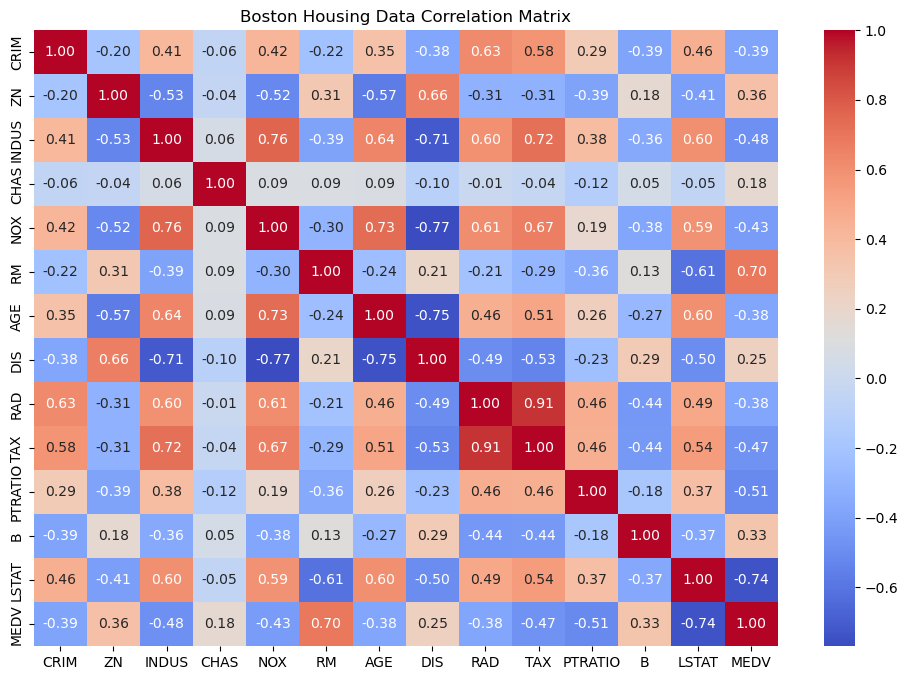

In [11]:
# 결과 출력
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Boston Housing Data Correlation Matrix")
plt.show()

In [17]:
# 상관 행렬 계산
corr_matrix = df.corr()

# 집값(MEDV)과의 상관관계 확인
target_corr = corr_matrix['MEDV'].sort_values(ascending = False)
target_corr

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [18]:
# 상관관계 기준으로 Feature Selection (절대값 0.4 이상)
selected_features = target_corr[abs(target_corr) > 0.4].index.tolist()
selected_features.remove('MEDV') # MEDV 제외
selected_features

['RM', 'NOX', 'TAX', 'INDUS', 'PTRATIO', 'LSTAT']

### 3. Mutual Information

In [21]:
# 유방암 환자 데이터셋

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target

In [23]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# k개의 feature 선택
k = 10

# 상호정보량 계산
mi = mutual_info_classif(X, Y)

# k개의 feature 선택
selector = SelectKBest(mutual_info_classif, k = k)
X_new = selector.fit_transform(X, Y)

# 상호정보량이 가장 높은 feature 10개 선택
topk_indices = mi.argsort()[::-1][:k]
topk_features = data.feature_names[topk_indices]
print(f"Top {k} Features:")
for feature in topk_features:
    print(f"- {feature}")

Top 10 Features:
- worst perimeter
- worst area
- worst radius
- mean concave points
- worst concave points
- mean perimeter
- mean concavity
- mean radius
- mean area
- area error


# Wrapper Method

### 후진 소거법 (Recursive Feature Elimination, RFE)

In [1]:
# RFE 예제 1

import numpy as np
from sklearn.linear_model import LogisticRegression # 1. 모든 특성을 포함하는 모델 선택 = LogisticRegression

data = [[32, 1, 1],
        [50, 3, 1],
        [43, 6, 1],
        [22, 0, 0],
        [35, 5, 0],
        [26, 5, 1]]
data = np.array(data)
label = [1, 1, 0, 1, 0, 0]

# 2. 선택한 모델을 사용하여 특성의 중요도 계산
# 3. 중요도가 가장 낮은 특성 제거
model = LogisticRegression().fit(data, label)
model_1 = LogisticRegression().fit(data[:, [1, 2]], label)
model_2 = LogisticRegression().fit(data[:, [0, 2]], label)
model_3 = LogisticRegression().fit(data[:, [0, 1]], label)

In [2]:
# 4. 특성 제거 후 남은 특성으로 새로운 모델 학습
model = LogisticRegression().fit(data[:, [1]], label)
print(model.predict(data[:, [1]]) - label)

[0 0 0 0 0 0]


In [3]:
# RFE 예제 2

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
Y = data.target

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select = 10)
rfe.fit(X, Y)

c:\Users\Noh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Noh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [8]:
rfe.get_support()

array([ True, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True, False])

In [5]:
selected_features = X[:, rfe.get_support()]
feature_names = data.feature_names[rfe.get_support()]

print("Selected Features:", feature_names)

Selected Features: ['mean radius' 'mean concavity' 'mean concave points' 'mean symmetry'
 'radius error' 'worst radius' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry']
